In [1]:
import cv2
import utils
import numpy as np
import torch
from torch import nn

import image_dataset
import training_loop
from pathlib import Path


BASE_PATH = Path('..')


Epoch 1/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4861409046558233
  	- val_loss = 0.44165839199666623
  	- acc = 0.785649265234287
  	- val_acc = 0.7896173563268449
 


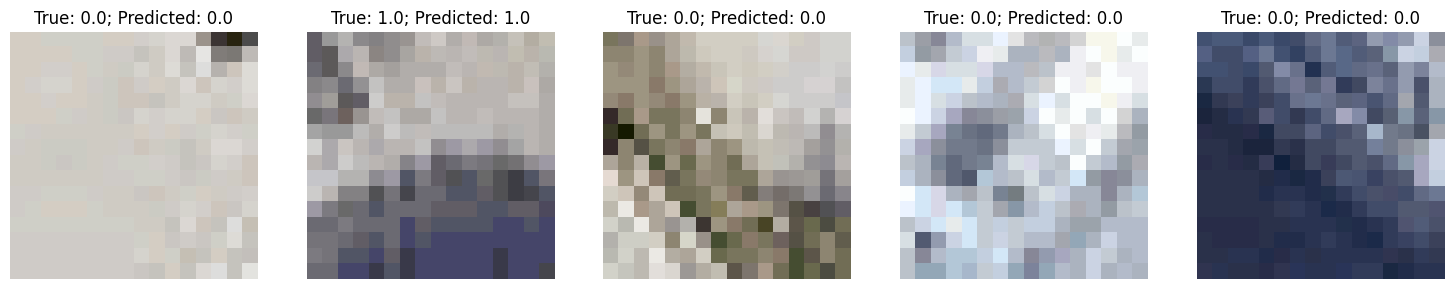

Epoch 2/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.45319677664683417
  	- val_loss = 0.43331720928351086
  	- acc = 0.7976444575419793
  	- val_acc = 0.8031087837837361
 


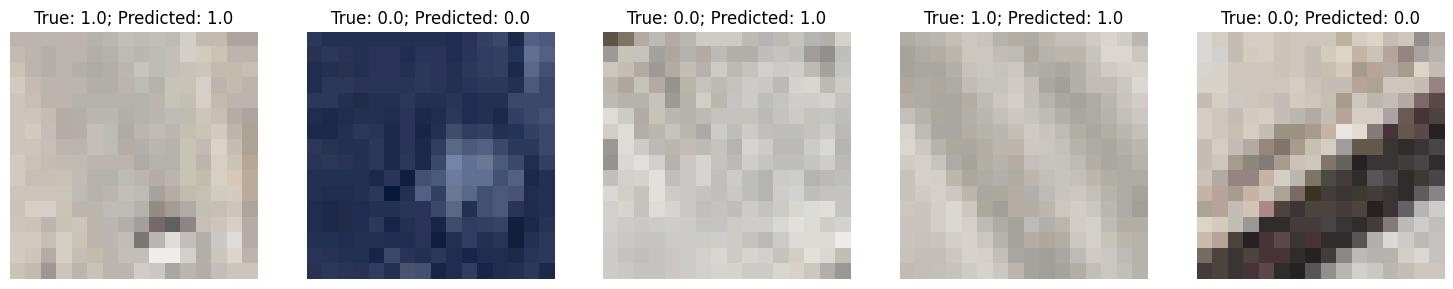

Epoch 3/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.44210445422392625
  	- val_loss = 0.4516439327487239
  	- acc = 0.800882619711069
  	- val_acc = 0.7839749952157339
 


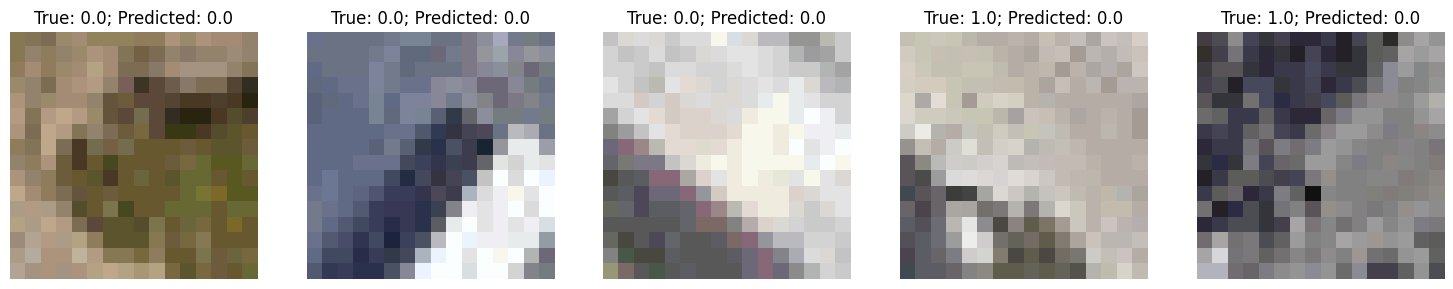

Epoch 4/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4342299920779008
  	- val_loss = 0.4376258789389222
  	- acc = 0.8025893504802998
  	- val_acc = 0.7866379861478452
 


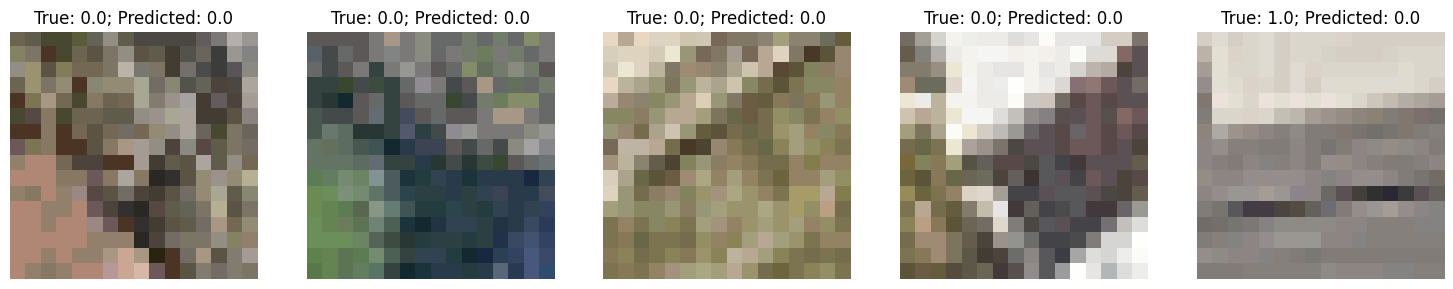

Epoch 5/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.42754919556471016
  	- val_loss = 0.4273478361191573
  	- acc = 0.807056422325281
  	- val_acc = 0.786927337999697
 


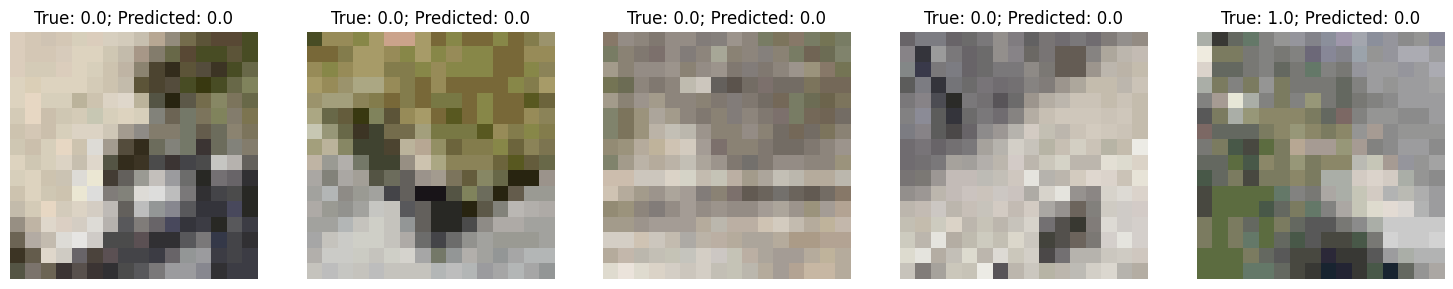

Epoch 6/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.423967271401332
  	- val_loss = 0.4554677362795229
  	- acc = 0.8086831004802997
  	- val_acc = 0.7613562654565882
 


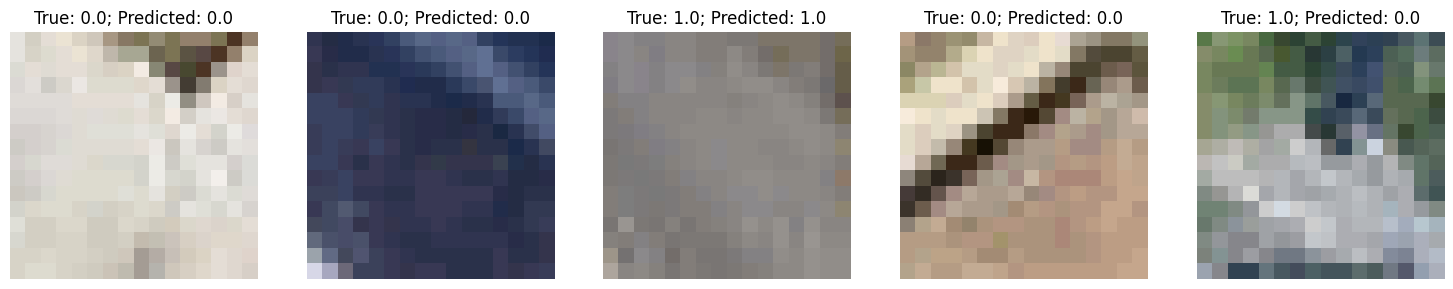

Epoch 7/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.41857565270020414
  	- val_loss = 0.431568357679579
  	- acc = 0.8107694575419793
  	- val_acc = 0.7842325501971774
 


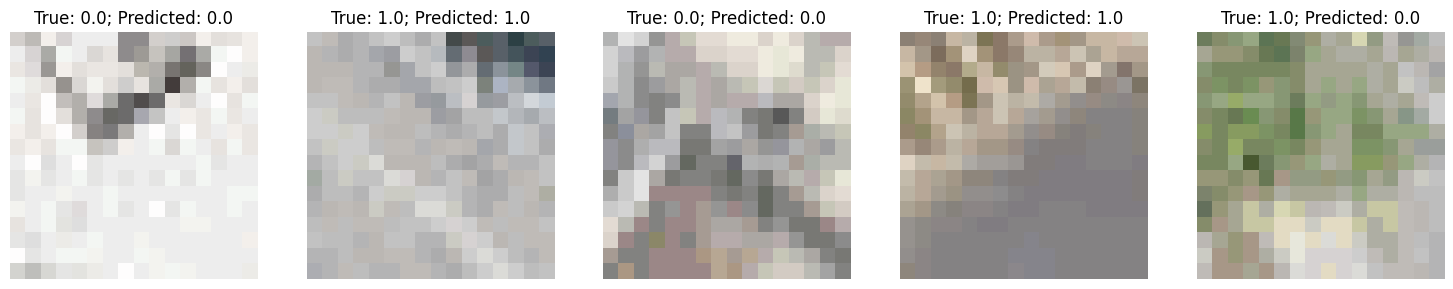

Epoch 8/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4167154252070647
  	- val_loss = 0.43736571239100563
  	- acc = 0.8106973421573639
  	- val_acc = 0.7716775415120302
 


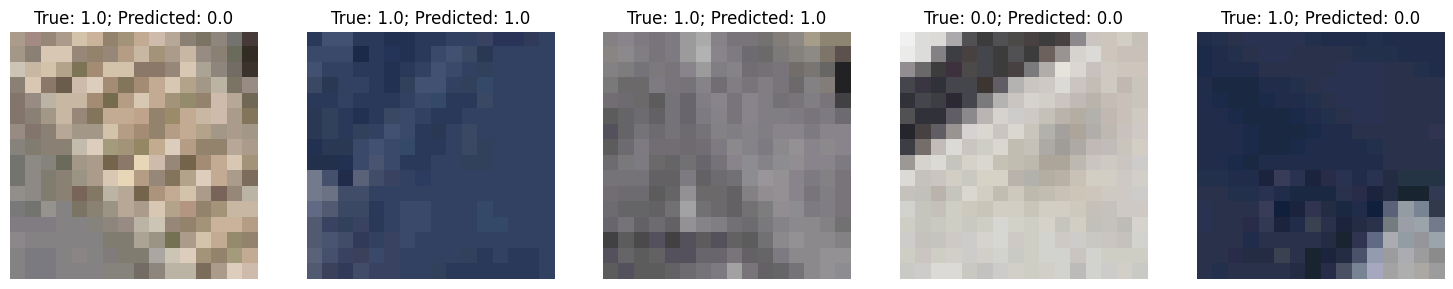

Epoch 9/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.41276956498622897
  	- val_loss = 0.48037792963010295
  	- acc = 0.8131181966341459
  	- val_acc = 0.7723564053023303
 


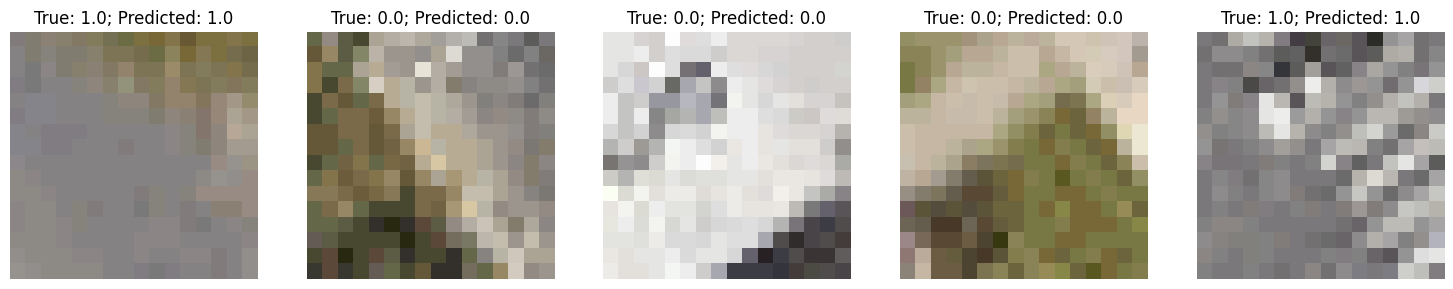

Epoch 10/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.40909524206931774
  	- val_loss = 0.4085215170074392
  	- acc = 0.814897042787992
  	- val_acc = 0.7902596537713651
 


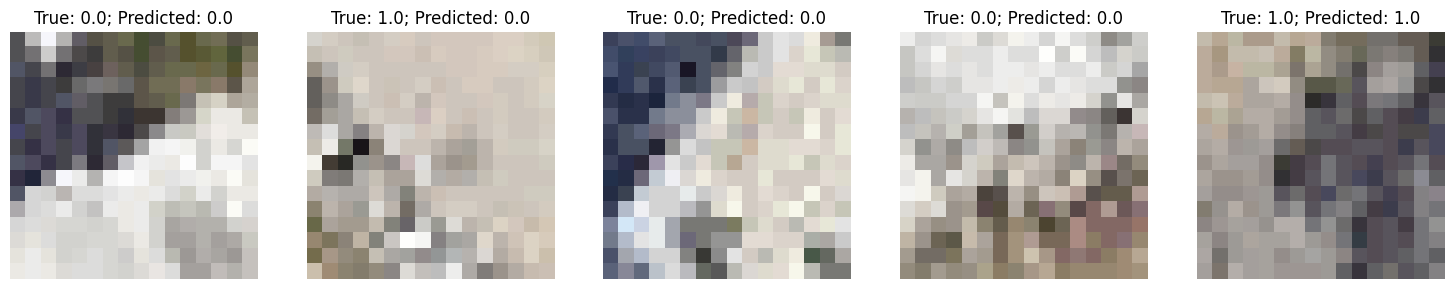

Epoch 11/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.40665206015110017
  	- val_loss = 0.41546195303952255
  	- acc = 0.8172548530651973
  	- val_acc = 0.8082582928516246
 


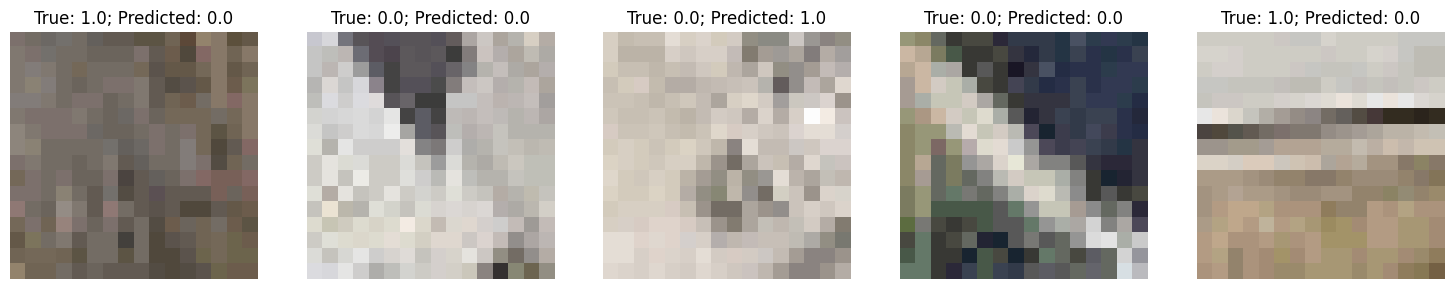

Epoch 12/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4059112117611445
  	- val_loss = 0.39235020732438125
  	- acc = 0.8162141690804409
  	- val_acc = 0.8303937095182913
 


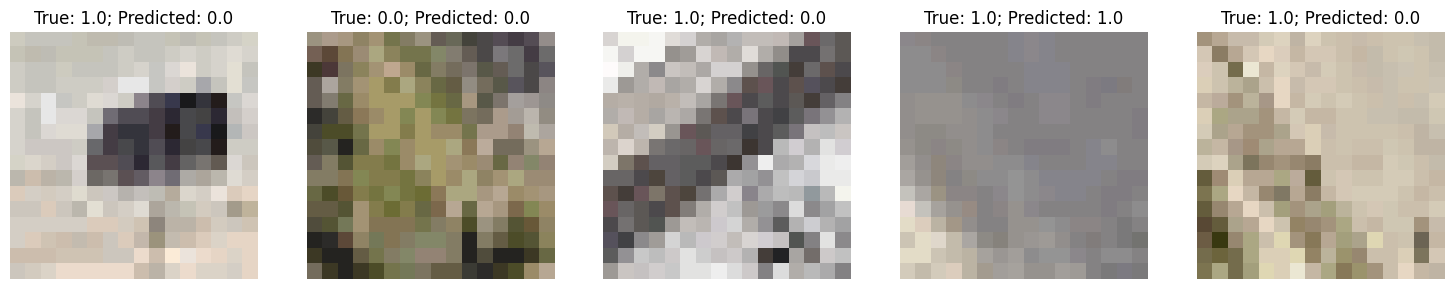

Epoch 13/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4032635607627722
  	- val_loss = 0.4066560196655768
  	- acc = 0.8177535377098963
  	- val_acc = 0.7992661275245525
 


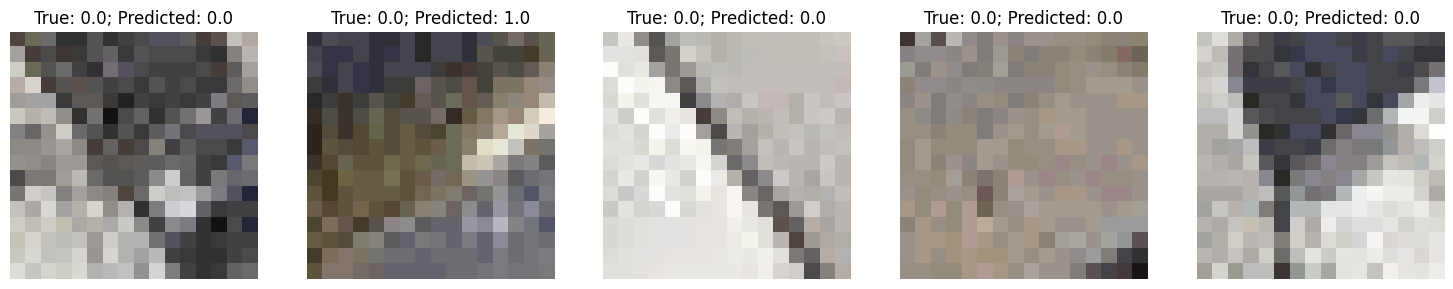

Epoch 14/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4027939254503984
  	- val_loss = 0.3965888624941861
  	- acc = 0.8183896498496716
  	- val_acc = 0.7977557745244768
 


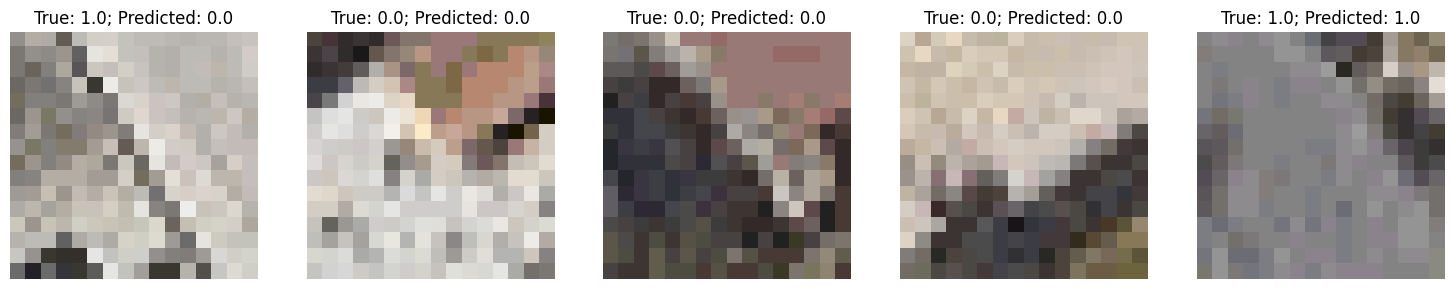

Epoch 15/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4004040543391154
  	- val_loss = 0.3869170546531677
  	- acc = 0.8195664006013137
  	- val_acc = 0.8152615615615139
 


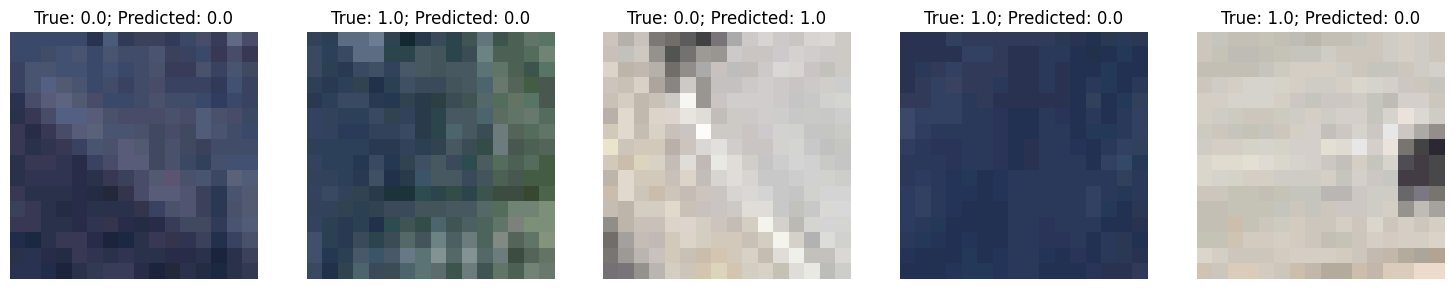

Epoch 16/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.39684094947118026
  	- val_loss = 0.6330117290770566
  	- acc = 0.8212273221749525
  	- val_acc = 0.7593212635428818
 


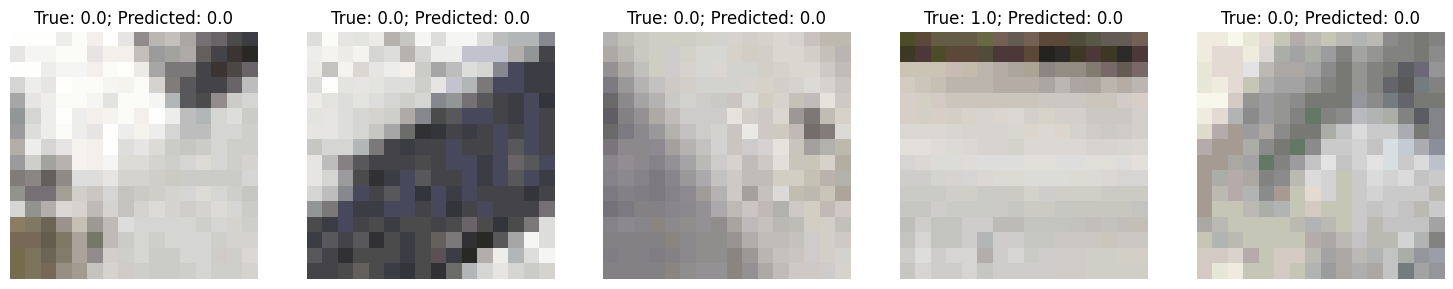

Epoch 17/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.3971093356150847
  	- val_loss = 0.41398778833724836
  	- acc = 0.8214604499706856
  	- val_acc = 0.7886046248453634
 


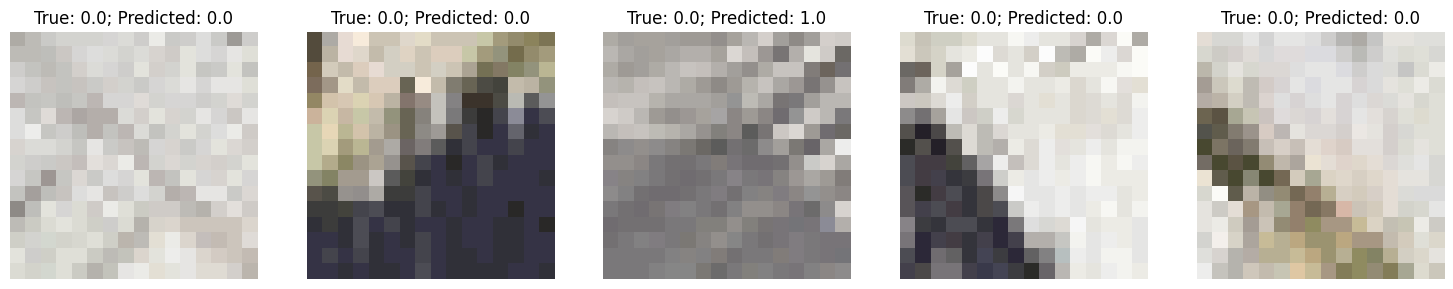

Epoch 18/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.39361530258105354
  	- val_loss = 0.3983627993751455
  	- acc = 0.8221165184791271
  	- val_acc = 0.799256588573809
 


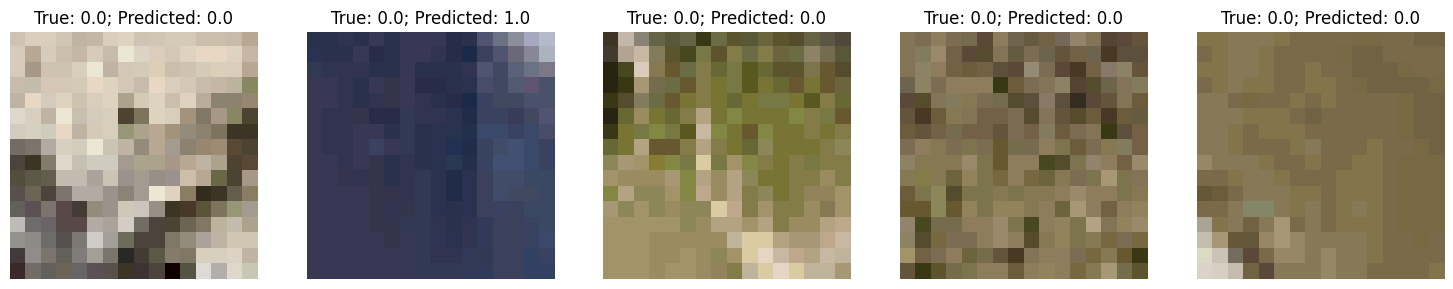

Epoch 19/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.3926589591228045
  	- val_loss = 0.4391355840144334
  	- acc = 0.8220323838637426
  	- val_acc = 0.7828811815491429
 


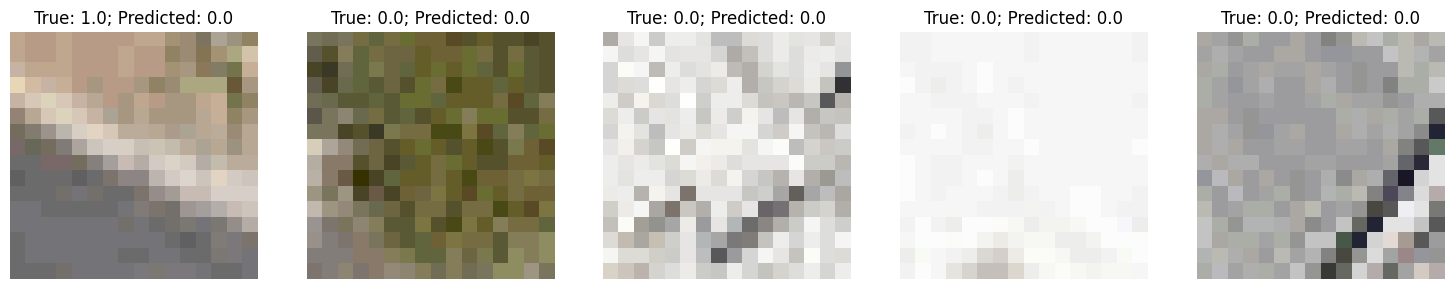

Epoch 20/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.3915287152849711
  	- val_loss = 0.3947748823298348
  	- acc = 0.824320119711069
  	- val_acc = 0.8183633497467747
 


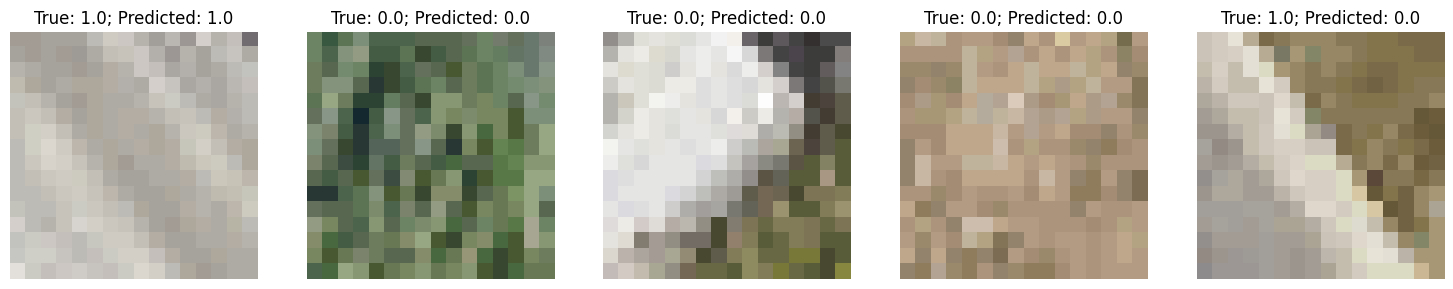

Finished Training


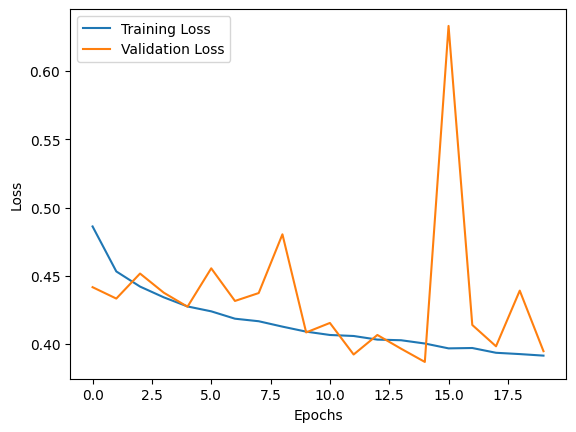

In [1]:
import patch_cnn

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # automatically select device
train_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'training',
                                           device)
val_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'validation', device)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=True)
model = patch_cnn.PatchCNN().to(device)
loss_fn = nn.BCELoss()
metric_fns = {'acc': patch_cnn.accuracy_fn}
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 20
training_loop.train(train_dataloader, val_dataloader, model, loss_fn, metric_fns, optimizer, n_epochs)

In [10]:

# predict on test set
test_path = BASE_PATH / 'data' / 'test' / 'images'
test_filenames = sorted(test_path.glob('*.png'))
test_images = utils.load_all_from_path(test_path)
test_images = test_images[:, :, :, :3]
test_patches = np.moveaxis(utils.image_to_patches(test_images), -1, 1)  # HWC to CHW
test_patches = np.reshape(test_patches, (25, -1, 3, utils.PATCH_SIZE, utils.PATCH_SIZE))  # split in batches for memory constraints
test_pred = [model(image_dataset.np_to_tensor(batch, device)).detach().cpu().numpy() for batch in test_patches]
test_pred = np.concatenate(test_pred, 0)
test_pred = np.round(test_pred.reshape(test_images.shape[0], test_images.shape[1] // utils.PATCH_SIZE, test_images.shape[1] // utils.PATCH_SIZE))

In [ ]:
import u_net
import patch_cnn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# reshape the image to simplify the handling of skip connections and maxpooling
train_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'training', device, use_patches=False, resize_to=(384, 384))
val_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'validation', device, use_patches=False, resize_to=(384, 384))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=True)
model = u_net.UNet().to(device)
loss_fn = nn.BCELoss()
metric_fns = {'acc': patch_cnn.accuracy_fn, 'patch_acc': u_net.patch_accuracy_fn}
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 35
print('entering training...')
training_loop.train(train_dataloader, val_dataloader, model, loss_fn, metric_fns, optimizer, n_epochs)

entering training...


Epoch 1/35:   0%|          | 0/34 [00:00<?, ?it/s]